   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

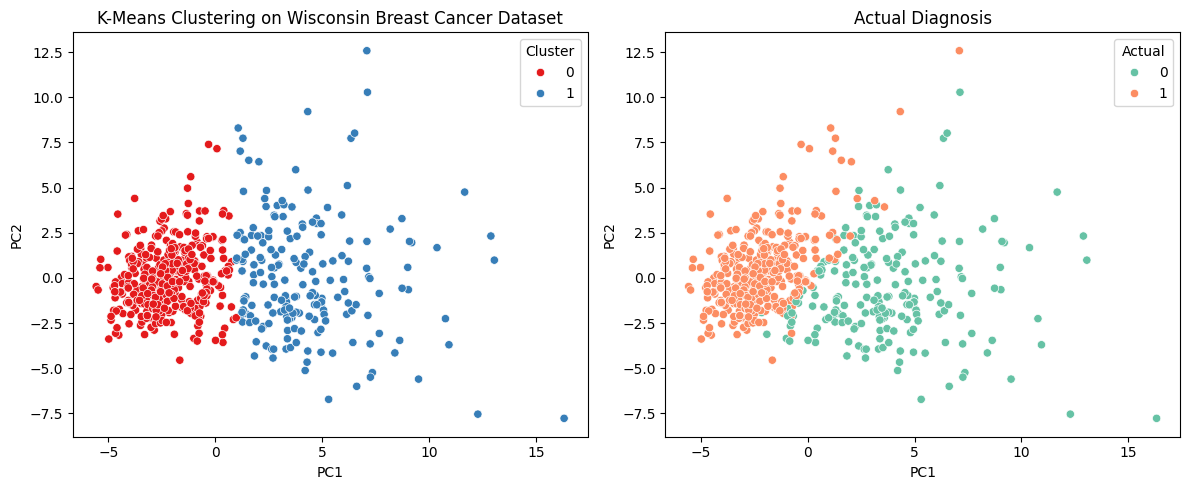

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
actual_labels = data.target # 0 = malignant, 1 = benign
print(df.head())
print(df.info())
print(df.shape)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_visual = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_visual['Cluster'] = cluster_labels
df_visual['Actual'] = actual_labels
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visual, palette='Set1')
plt.title('K-Means Clustering on Wisconsin Breast Cancer Dataset')
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Actual', data=df_visual, palette='Set2')
plt.title('Actual Diagnosis')
plt.tight_layout()
plt.show()